In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../datasets_Ruppert/Stock_Bond.csv")


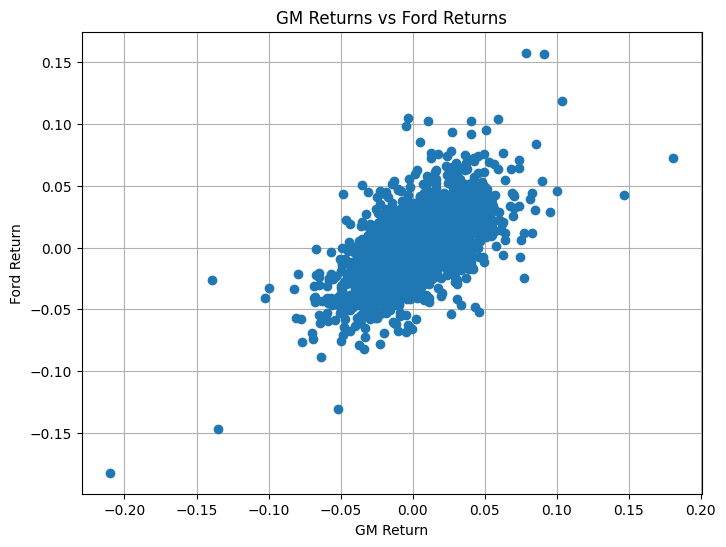

In [4]:
GMReturn = data['GM_AC'].iloc[1:].values / data['GM_AC'].iloc[:-1].values - 1
FReturn = data['F_AC'].iloc[1:].values / data['F_AC'].iloc[:-1].values - 1

# Plot
plt.figure(figsize=(8, 6))
plt.plot(GMReturn, FReturn, 'o')  # 'o' for scatter points
plt.xlabel('GM Return')
plt.ylabel('Ford Return')
plt.title('GM Returns vs Ford Returns')
plt.grid(True)
plt.show()

## **Problem 1**

### Do the GM and Ford returns seem positively correlated? Do you notice any outlying returns? 

#### If “yes,” do outlying GM returns seem to occur with outlying Ford returns?

GM and Ford returns seem to be positively correlated, you can see negative GM returns between -(15 to 18)% and the most GM returns between 15 and 20%. Outlying GM returns seem to occur with outlying ford returns to some extent but it's not perfect overall peak returns for ford happen between 16-18%

## Problem 2 
### Compute the log returns for GM and plot the returns versus the log returns.

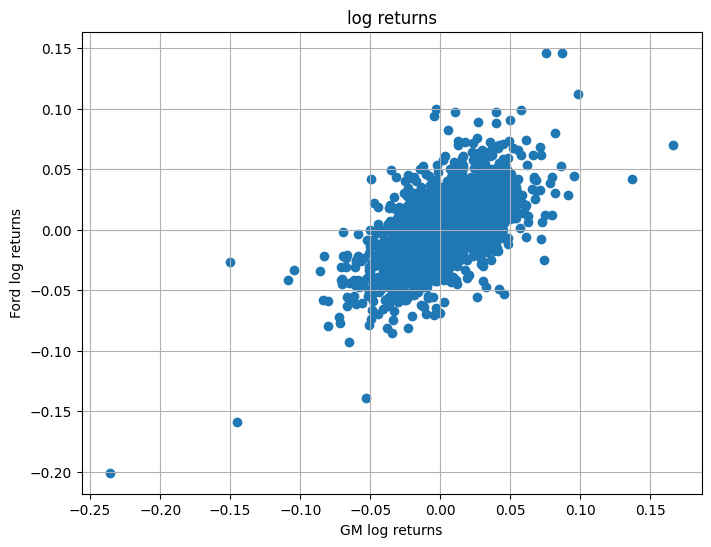

In [5]:
GMLogReturn = np.log(data["GM_AC"].iloc[1:].values / data["GM_AC"].iloc[:-1].values)
FordLogReturn = np.log(data["F_AC"].iloc[1:].values / data["F_AC"].iloc[:-1].values)

plt.figure(figsize=(8,6))
plt.scatter(GMLogReturn, FordLogReturn)
plt.xlabel('GM log returns')
plt.ylabel('Ford log returns')
plt.title('log returns')
plt.grid(True)
plt.show()

## How highly correlated are the two types of returns? (The R functioncor() computes correlations.)

In [6]:
correlation_np = np.corrcoef(GMLogReturn, FordLogReturn)[0,1]
correlation_np

0.6168254898042278

Ford and GM returns seems to have a strong correlation which makes sense as they are both auto manufacturer's so they operate under similar market conditions

## Problem 3 
### Repeat Problem 1 with Microsoft (MSFT) and Merck (MRK)

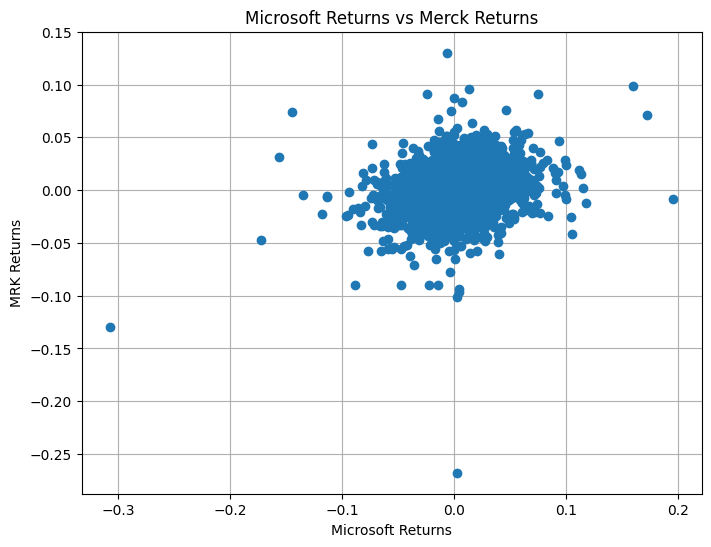

In [42]:
# FYI, AC stands for adjusted closing price

MSReturns = data['MSFT_AC'].iloc[1:].values / data['MSFT_AC'].iloc[:-1].values -1
MKReturns = data['MRK_AC'].iloc[1:].values / data['MRK_AC'].iloc[:-1].values - 1

plt.figure(figsize= (8,6))
plt.plot(MSReturns, MKReturns, 'o')
plt.title('Microsoft Returns vs Merck Returns')
plt.xlabel('Microsoft Returns')
plt.ylabel('MRK Returns')
plt.grid(True)
plt.show()

Microsoft and Merck seem to have positively correlated but weak returns. 
This makes sense as both companies operate in different industries(Merck is Pharma company). For example when microsoft had a return of 20%, MRK had a return of roughly 0%

In [44]:
np.corrcoef(MSReturns, MKReturns)[0,1]


0.27103275070806065

## Problem 4
### What is the probability that the value of the stock will be below $950,000 at the close of at least one of the next 45 trading days? 
### To answer this question, run the code below.


In [16]:
def simulation():
    n = int(1e5) # number of iterations
    below = np.zeros(n) # np array of n elements of zeros
    rng = np.random.default_rng(2009)
    
    for i in range(n):
         # assume annual return is 5% and annual volatility is 23%
        r = rng.normal(0.05/253,0.23/np.sqrt(253),45) # normal(mean, standard deviation, size)
        # generates random numbers
        logprice = np.log(1e6)+np.cumsum(r) # cumsum is cummaltive sum
        minlogp = np.min(logprice)  # minimum price over next 45 days
        below[i]= int(minlogp < np.log(950000))
    return np.mean(below)

In [17]:
f"Approximately {simulation()} %"

'Approximately 0.50869 %'

The volatility dominates over the small positive drift for this short time period, so it's roughly a coin flip

## Problem 5

### What is the probability that the hedge fund will make a profit of at least $100,000?

In [33]:
def strat():
    n = int(1e5)
    profit = np.zeros(n)
    rng = np.random.default_rng(26)

    for i in range(n):
        r = rng.normal(0.05/253,0.23/np.sqrt(253),100)
        logprice = np.log(1e6) + np.cumsum(r)
        price = np.exp(logprice)
        for day in range(100):
            if price[day] >= 1.1e6:
                profit[i] = 1
                break
            if price[day] < 0.95e6: break
        
    return np.mean(profit)
    

In [34]:
f"Approximately {strat()*100} %"

'Approximately 38.719 %'

Sounds unrealistic at first but makes sense given that the principal is 1 million, so there's a 38% likelihood that the hedge fund will make a 10% roi in 45 days

## Problem 6 
### What is the probability the hedge fund will suffer a loss?

In [28]:
def strat1():
    n = int(1e5)
    loss = np.zeros(n)
    rng = np.random.default_rng(29)

    for i in range(n):
        r = rng.normal(0.05/253,0.23/np.sqrt(253),100)
        logp = np.log(1e6)+np.cumsum(r)
        price = np.exp(logp)
        for day in range(100):
            if price[day] < 0.95e6: 
                loss[i] = 1
                break
            if price[day] >= 1.1e6: break
    return np.mean(loss)

In [35]:
f"Approximately {strat1()*100} %"

'Approximately 58.684999999999995 %'

## Problem 7 
### What is the expected profit from this trading strategy?

In [54]:
def strat2():
    n = int(1e5)
    profits = np.zeros(n)
    rng = np.random.default_rng(29)
    
    for i in range(n):
        r = rng.normal(0.05/253, 0.23/np.sqrt(253), 100)
        logp = np.log(1e6) + np.cumsum(r)
        price = np.exp(logp)
        final = price[99]
        
        for day in range(100):
            if price[day] >= 1.1e6: 
                final = 1.1e6
                break
            if price[day] < 0.95e6:
                final = 0.95e6
                break  # ← Added this
        
        profits[i] = final - 1e6  # ← Changed from 1.1e6 to 1e6
    
    return np.mean(profits)

In [56]:
f"Approximately {strat2()} dollars"

'Approximately 10099.399028204047 dollars'

Slightly profitable on average but has high risk

## Problem 8 
What is the expected return? When answering this question, remember that only $50,000 was invested. Also, the units of return are time,
e.g., one can express a return as a daily return or a weekly return. Therefore,
one must keep track of how long the hedge fund holds its position before selling.

In [7]:
def expected_return():
    n = int(1e5)
    returns = np.zeros(n)
    rng = np.random.default_rng(29)
    
    for i in range(n):
        r = rng.normal(0.05/253, 0.23/np.sqrt(253), 100) # produce random return rates
        
        logp = np.log(1e6) + np.cumsum(r) # log price
        price = np.exp(logp) # convert to actual price
        final_price = price[99] #sell after 100 days, if price stays between 1,100,000 and 950,000
        
        for day in range(100):
            if price[day] >= 1.1e6:
                final_price = 1.1e6
                break
            if price[day] < 0.95e6:
                final_price = 0.95e6
                break
        
        final_equity = max(0, final_price - 950000) 
        returns[i] = (final_equity - 50000) / 50000
    
    return np.mean(returns)

In [9]:
f"Approximately {expected_return()*100} %"

'Approximately 20.198798056408094 %'

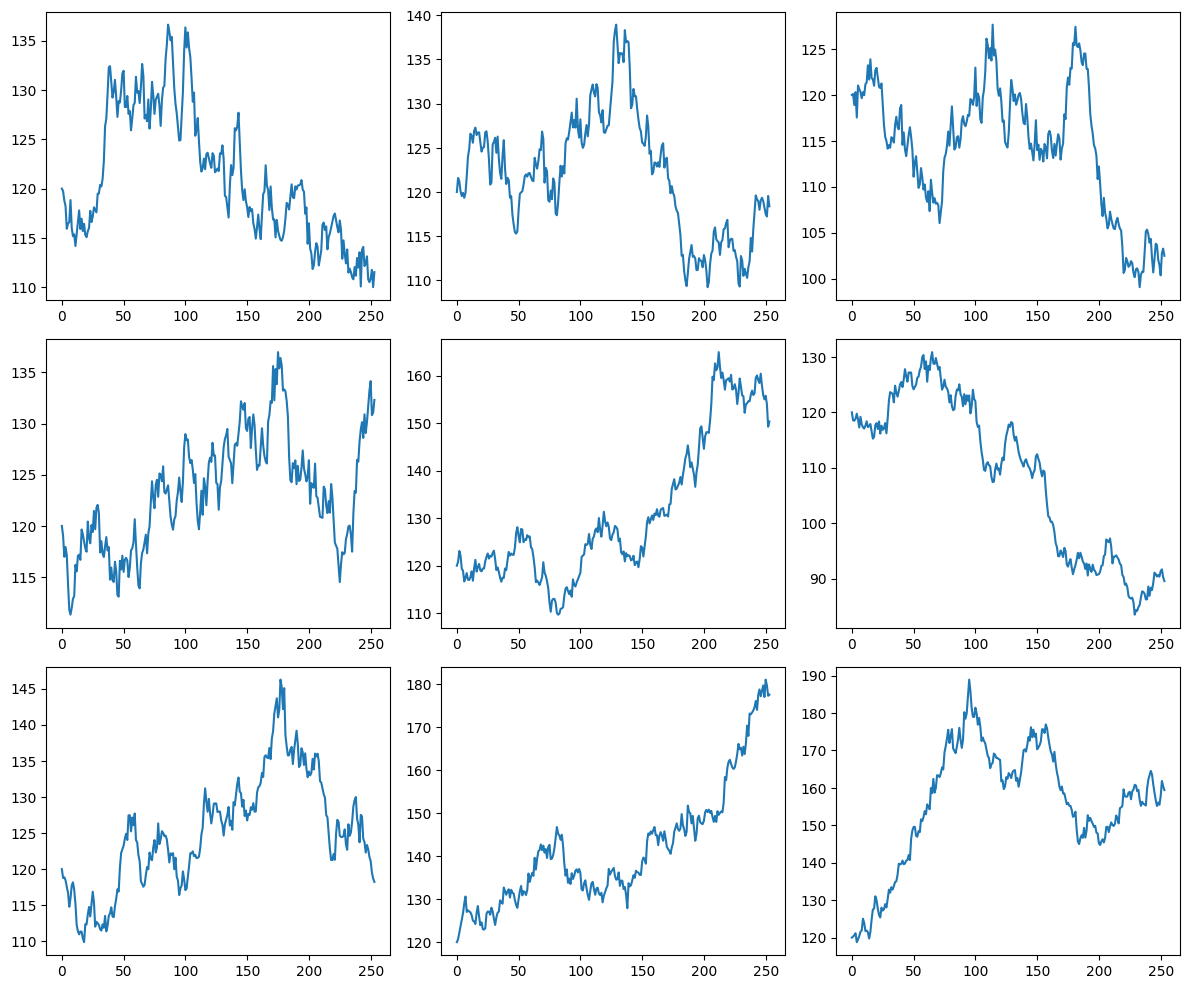

In [10]:

np.random.seed(2012)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for ax in axes.flat:
    logr = np.random.normal(0.05/253, 0.2/np.sqrt(253), 253)
    ax.plot(120 * np.exp(np.concatenate([[0], np.cumsum(logr)])))

plt.tight_layout()
plt.show()

## Problem 9 
### In this simulation, what are the mean and standard deviation of the log-returns for 1 year?

In [11]:
np.random.seed(2012)
logr = np.random.normal(0.05/253, 0.2/np.sqrt(253), (10000, 253))
annual_returns = logr.sum(axis=1)

print(f"Mean: {annual_returns.mean():.6f}")
print(f"Std: {annual_returns.std(ddof=1):.6f}")

Mean: 0.044946
Std: 0.198460


## Problem 10 
### Discuss how the price series appear to have momentum. Is the appearance of momentum real or an illusion?

The graphs appear to show momentum - stocks that rise tend to keep rising, and stocks that fall tend to keep falling. However, this is an illusion. 
The code generates each day's return independently from the same distribution, meaning there's no true momentum. The apparent trends are caused by random clustering: by chance, we get sequences of positive or negative returns that accumulate (via cumsum) into visible trends. This demonstrates how random walks can create the appearance of patterns even when none exist.

## Problem 11 
### Explain what the code c(120,120*exp(cumsum(logr))) does

Creates a price path starting at 120 dollars. Overall it transforms a series of independent daily log returns into a 
continuous price path that compounds over time, starting from $120.

In [23]:
data1 = pd.read_csv("../datasets_Ruppert/MCD_PriceDaily.csv")
adjC = data1['Adj Close']

In [24]:
data1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99
1,1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58
2,1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85
3,1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24
4,1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19
